# BIOMATH 205 - Computational Algorithms

All code is the work of Prof. Kenneth Lange. These notebooks are written in part to demonstrate the algorithms and show whats going on internally instead of just reading code from a textbook. All of this work is written in the Julia programming language. If there are any questions feel free to contact the user below.

- Simon Lee (simonlee711@g.ucla.edu)

In [4]:
using FFTW  # For Fast Fourier Transform

function approximate_derivative(func, k, h, N=10000)
    """
    Function to approximate the k-th derivative of the function func at 0.

    :param func: The function to approximate the derivative of.
    :param k: The order of the derivative to approximate.
    :param h: The radius of the small circle in the complex plane.
    :param N: The number of points used for the DFT.
    :return: The approximated k-th derivative.
    """

    # Generate N points on the boundary of the circle of radius h
    t = LinRange(0, 1, N)  # Define the range without the endpoint
    circle_points = h .* exp.(2im * π * t)

    # Evaluate the function on these points
    func_values = func.(circle_points)

    # Compute the Discrete Fourier Transform using FFT
    dft = fft(func_values) / N

    # Extract and scale the coefficient for the k-th derivative
    derivative = k * real(dft[k + 1]) / h^k

    return derivative
end

# Test the function with various functions
exp_func(x) = exp(x)
sin_func(x) = sin(x)
tan_func(x) = tan(x)


# Test and print the derivatives
println("Derivative of Sin(x) at x=0: ", approximate_derivative(sin_func, 1, 0.001))
println("Derivative of e^x(x) at x=0: ", approximate_derivative(exp_func, 1, 0.001))
println("Derivative of tan(x) at x=0: ", approximate_derivative(tan_func, 1, 0.001))


Derivative of Sin(x) at x=0: 0.9999999341743497
Derivative of e^x(x) at x=0: 1.0000000342143436
Derivative of tan(x) at x=0: 0.9999999342493457


In [2]:
import numpy as np

# Function to approximate the k-th derivative of a function at 0
def approximate_derivative(func, k, h, N=10000):
    """
    Function to approximate the k-th derivative of the function func at 0.

    :param func: The function to approximate the derivative of.
    :param k: The order of the derivative to approximate.
    :param h: The radius of the small circle in the complex plane.
    :param N: The number of points used for the DFT.
    :return: The approximated k-th derivative.
    """

    # Generate N points on the boundary of the circle of radius h
    t = np.linspace(0, 1, N, endpoint=False)
    circle_points = h * np.exp(2j * np.pi * t)

    # Evaluate the function on these points
    func_values = func(circle_points)

    # Compute the Discrete Fourier Transform
    dft = np.fft.fft(func_values) / N

    # Extract and scale the coefficient for the k-th derivative
    derivative = k * np.real(dft[k]) / h**k

    return derivative

# Test the function with various functions
def exp_func(x):
    return np.exp(x)

def sin_func(x):
    return np.sin(x)

def cos_func(x):
    return np.cos(x)

def tan_func(x):
    return np.tan(x)

def log_func(x):
    return np.log(x)

def sqrt_func(x):
    return np.sqrt(x)

# Test and print the derivatives
print("Derivative of Sin(x) at x=0:", approximate_derivative(sin_func, 1, 0.001))
print("Derivative of Cos(x) at x=0:", approximate_derivative(cos_func, 1, 0.001))
print("Derivative of e^x(x) at x=0:", approximate_derivative(exp_func, 1, 0.001))
print("Derivative of tan(x) at x=0:", approximate_derivative(tan_func, 1, 0.001))


Derivative of Sin(x) at x=0: 1.0
Derivative of Cos(x) at x=0: -2.5946066962357906e-21
Derivative of e^x(x) at x=0: 1.0000000000000007
Derivative of tan(x) at x=0: 1.0


In [1]:
using FFTW

N = 256

# Define the function sin(x)
f(x) = sin(x)

# Redefine the radius h for N equally spaced points over the interval [0, 2pi)
h = 2 * π / N

# Generate the points x_j on the interval [0, 2pi) without including the endpoint
x_j = h * collect(0:N-1)

# Evaluate the function at these points
f_x_j = f.(x_j)

# Compute the discrete Fourier transform of these points
b_k = fft(f_x_j)

# To find the first derivative, we need to multiply by the appropriate factor
# The factor for the k-th coefficient is (ik) due to the derivative property of Fourier series
# Here we construct the multiplier for the derivative
k = fftfreq(N, h) * im * 2 * π

# Now multiply the DFT coefficients by this factor and take the inverse DFT to get the derivatives
f_prime = ifft(b_k .* k)

# The derivative at x=0 is the first value in the array of derivatives
derivative_at_0 = real(f_prime[1])  # We take the real part since the derivative of sin is a real function

# Compare the approximation to the exact value
exact_value = 1

println("approximation: ", derivative_at_0)
println("actual value: ", exact_value)
println("absolute difference: ", abs(derivative_at_0 - exact_value))


approximation: 0.0006023928467461714
actual value: 1
absolute difference: 0.9993976071532539


In [5]:
import numpy as np

N=256

# Define the function sin(x)
def f(x):
    return np.sin(x)

# Redefine the radius h for N equally spaced points over the interval [0, 2pi)
h = 2 * np.pi / N

# Generate the points x_j on the interval [0, 2pi) without including the endpoint
x_j = h * np.arange(N)

# Evaluate the function at these points
f_x_j = f(x_j)

# Compute the discrete Fourier transform of these points
b_k = np.fft.fft(f_x_j)

# To find the first derivative, we need to multiply by the appropriate factor
# The factor for the k-th coefficient is (ik) due to the derivative property of Fourier series
# Here we construct the multiplier for the derivative
k = np.fft.fftfreq(N, d=h) * 2j * np.pi

# Now multiply the DFT coefficients by this factor and take the inverse DFT to get the derivatives
f_prime = np.fft.ifft(b_k * k)

# The derivative at x=0 is the first value in the array of derivatives
derivative_at_0 = f_prime[0].real  # We take the real part since the derivative of sin is a real function

# Compare the approximation to the exact value

exact_value = 1

derivative_at_0, exact_value, np.abs(derivative_at_0 - exact_value)

print("approximation:", derivative_at_0)
print("actual value:", exact_value)
print("absolute difference", str(np.abs(derivative_at_0 - exact_value)))

approximation: 1.0000000000000042
actual value: 1
absolute difference 4.218847493575595e-15


In [3]:
using FFTW

# Define the function sin_function(x)
sin_function(x) = sin.(x)

# Number of points (the more points, the better the approximation)
N = 256

# The radius h, defining the small circle's boundary in the complex plane
h = 2 * π / N

# The points x_j on the boundary of the circle
x_j = h * collect(0:N-1)

# Evaluate the function at these points
f_x_j = sin_function(x_j)

# Compute the discrete Fourier transform of these points
b_k = fft(f_x_j)

# Construct the multiplier for the derivative using the wave numbers
# Note: The wave numbers need to be arranged correctly for Julia's fftfreq output
k = (0:N-1) |> fftfreq
k = ifftshift(k)  # Shift the zero frequency to the center for correct multiplication
k = k * 2π * im / h

# Multiply the DFT coefficients by this factor to get the derivatives
f_prime = ifft(b_k .* k)

# The derivative at x=0 is the first value in the array of derivatives
derivative_at_0 = real(f_prime[1])  # Take the real part since we expect a real number

# The exact value of the first derivative of sin(x) at x=0 is cos(0) = 1
exact_value = 1

# Output the results
println("Approximation of the derivative at x=0: ", derivative_at_0)
println("Exact value of the derivative at x=0: ", exact_value)
println("Absolute error: ", abs(derivative_at_0 - exact_value))


LoadError: MethodError: no method matching fftfreq(::UnitRange{Int64})
[0mClosest candidates are:
[0m  fftfreq([91m::Int64[39m) at ~/.julia/packages/AbstractFFTs/4iQz5/src/definitions.jl:499
[0m  fftfreq([91m::Int64[39m, [91m::Number[39m) at ~/.julia/packages/AbstractFFTs/4iQz5/src/definitions.jl:499

In [60]:
using RDatasets
df = dataset("count", "titanic") # data frame
y = convert(Vector{Float64}, df[:, 1]); # responses
X = Tables.matrix(df[:, 2:4]) # cases by predictors
df

Row,Survived,Age,Sex,Class
,Int64,Int64,Int64,Int64
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


In [ ]:
using LinearAlgebra, ForwardDiff, Printf, SpecialFunctions, RDatasets, Tables, DataFrames

In [2]:
using LinearAlgebra, ForwardDiff, Printf, SpecialFunctions, RDatasets, Tables, DataFrames

include("Search.jl") # Include the Search.jl file

# Define logistic regression cost function
function logistic_regression(par, X, y)
    m = length(y)
    predictions = 1 ./ (1 .+ exp.(-X * par))
    cost = -sum(y .* log.(predictions) + (1 .- y) .* log.(1 .- predictions)) / m
    return cost
end

# Initialize logistic regression problem for Titanic dataset
function initial_titanic()
    df = dataset("count", "titanic") # data frame
    y = convert(Vector{Float64}, df[:, 1]); # responses
    X = Tables.matrix(df[:, 2:4]) # cases by predictors

    pars = size(X, 2)
    constraints = 0
    points = 1
    travel = "search"
    title = "Titanic Logistic Regression"
    cases = 0
    standard_errors = false

    grid, pname, par, pmin, pmax, constraint, level, goal = set_search_defaults(constraints, pars, points, travel)
    par .= 0.0
    goal = "minimize"
    return (grid, pname, par, pmin, pmax, constraint, level, travel, goal, title, cases, standard_errors)
end

# Run logistic regression on the Titanic dataset
(par, f) = search((par) -> logistic_regression(par, X, y), initial_titanic, stdout)


LoadError: LoadError: invalid redefinition of constant f
in expression starting at /Users/simonlee/UCLA-Grad-Courses/BIOMATH-205/Search.jl:1252

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


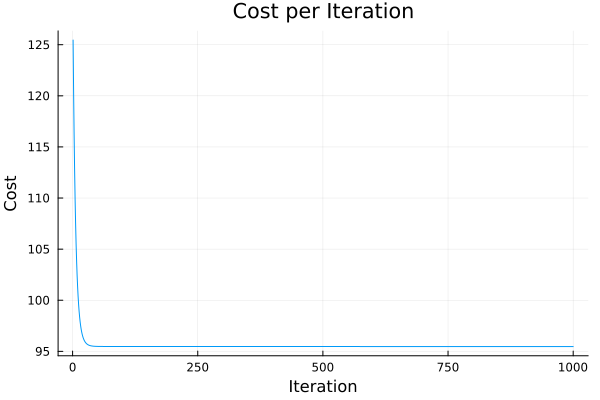

Final Accuracy: 0.6666666666666666


(Dict{Any, Any}("W5" => [-0.3816420400273195 0.5046398087780836 -0.42016673524429465 0.15645670298769132], "W2" => [-0.4691142919982503 0.09753904097038538 … 0.6625018763618754 -0.12433035597737056; 0.16765633879440364 -0.07499579245553283 … 0.575967191672415 -0.2694402953770302; … ; -0.39452492887125123 0.46558725895267056 … 0.14403048575858415 -0.09514706619476815; 0.017029218928353265 -0.11626155748488518 … 0.17388904497189084 -0.0630465904166946], "W3" => [-0.16666220703834417 0.6440250483573461 … 0.42453901590857845 -0.497689352388218; -0.21511445981179106 -0.07407521197650373 … -0.0009898252815805973 0.10523309056008771; … ; -0.1408678974156041 -0.030136942903829334 … -0.12408990142125259 -0.5735437731228585; -0.3662377312265578 0.4011596349809852 … -0.34855099200990536 0.05775680318350997], "W4" => [-0.015915587379789244 0.08962662138630614 … 0.11432611412778909 0.34760778358039046; -0.614883321905765 0.156629459543969 … 0.2634932101948235 -0.009851849935831984; -0.4745106802902

In [8]:
using LinearAlgebra, Plots, RDatasets, StatsBase

function logistic(x, y) # loss
    (u, du) = (similar(x), similar(x))
    @. u = - (y * log(x) + (1 - y) * log(1 - x))
    @. du = - (y - x) / (x * (1 - x))
    return (u, du)
end

function sigmoid(z)
    a = similar(z)
    da = similar(z)
    @. a = 1 / (1 + exp(-z))
    @. da = a * (1 - a)
    return (a, da)
end

function initialize(nodes)
    par = Dict()
    for l = 1:length(nodes) - 1
        (W, b) = ("W" * string(l), "b" * string(l))
        par[W] = randn(nodes[l + 1], nodes[l]) / sqrt(nodes[l])
        par[b] = zeros(nodes[l + 1], 1)
    end
    return par
end

function update(par, grad, layers, t)
    for l = 1:layers - 1
        (W, b) = ("W" * string(l), "b" * string(l))
        par[W] = par[W] - t * grad[W]
        par[b] = par[b] - t * grad[b]
    end
    return par
end

function forward(X, par, cases, activation, layers)
    z = X
    cache = [(z, zeros(0,0))]
    for l = 1:layers - 1
        (W, b) = ("W" * string(l), "b" * string(l))
        (a, da) = activation(par[W] * z .+ (par[b] * ones(cases)'))
        push!(cache, (a, da))
        z = a
    end
    return cache
end

function backward(X, y, par, cache, activation, loss, layers)
    grad = Dict()
    (a, da) = cache[layers]
    (obj, dZ) = loss(a, y)
    cost = sum(obj)
    dZ = da .* dZ
    for l = reverse(1:layers - 1)
        (a, da) = cache[l]
        (W, b) = ("W" * string(l), "b" * string(l))
        grad[W] = dZ * a'
        grad[b] = sum(dZ, dims = 2)
        if l > 1
            dZ = par[W]' * dZ
            dZ = da .* dZ
        end
    end
    return (cost, grad)
end

function compute_accuracy(X, y, par, activation, layers)
    cache = forward(X, par, size(X, 2), activation, layers)
    predictions = cache[end][1]
    return mean((predictions .> 0.5) .== y)
end

function train(nodes, X, y, t, iters, fun, plot_name)
    (activation, loss) = fun
    (cases, layers) = (size(X, 2), length(nodes))
    par = initialize(nodes)
    cost = zeros(iters)
    for i = 1:iters
        cache = forward(X, par, cases, activation, layers)
        (cost[i], grad) = backward(X, y, par, cache, activation, loss, layers)
        par = update(par, grad, layers, t)
    end
    final_accuracy = compute_accuracy(X, y, par, activation, layers)
    cost_plot = plot(1:iters, cost, legend = false, title = "Cost per Iteration", xlabel = "Iteration", ylabel = "Cost")
    display(cost_plot)
    savefig(plot_name)
    println("Final Accuracy: ", final_accuracy)
    return par, cost
end

# Using the Iris dataset
df = dataset("datasets", "iris")
y = convert(Vector{Float64}, df[:, "Species"] .== "setosa")
println(y)
y = reshape(y, 1, length(y))
XT = Tables.matrix(df[:, 1:4])
X = Matrix(XT')
X = convert(Matrix{Float64}, X)

# Define network structure with four hidden layers
nodes = [size(X, 1), 10, 8, 6, 4, 1]  # Input layer, four hidden layers, and output layer
fun = (sigmoid, logistic)
(t, iters, plot_name) = (0.001, 1000, "Iris.png")
(par, loss) = train(nodes, X, y, t, iters, fun, plot_name)


In [38]:
using RDatasets, Tables, LinearAlgebra, SpecialFunctions
include("Search.jl")  # Make sure this path is correct to include your Search.jl file

# Load Titanic dataset
df = dataset("count", "titanic")
y = convert(Vector{Float64}, df[:, 1])  # responses
X = Tables.matrix(df[:, 2:4])  # predictors
X = float.(X)  # Ensure that predictors are numerical

# Define the logistic regression function
function logistic_regression(beta)
    logits = X * beta
    log_likelihood = sum(y .* logits - log1p.(exp.(logits)))
    return -log_likelihood  # Negative for minimization
end

# Define an initialization function for the logistic regression problem
function logistic_regression_initialization()
    # Define the number of parameters (size of beta)
    pars = size(X, 2)
    # No constraints for basic logistic regression
    constraints = 0
    points = 1  # Only one starting point
    travel = "search"
    
    # Set up other parameters as needed for your problem
    # For simplicity, this example uses broad settings
    grid, pname, par, pmin, pmax, constraint, level, goal = 
        set_search_defaults(constraints, pars, points, travel)
    
    # Set the initial guess for beta
    par .= 0.0

    # Define bounds, goal, title, etc., as needed
    # ...

    return (grid, pname, par, pmin, pmax, constraint, level, travel, 
        goal, title, cases, standard_errors)
end

# Optimization using the search function
optimized_beta, fmin = search(logistic_regression, logistic_regression_initialization, stdout)

# Output the results
println("Optimized Parameters: ", optimized_beta)
println("Function Minimum: ", fmin)


                       Search, Julia Version

                 (c) Copyright Kenneth Lange, 2022



LoadError: UndefVarError: title not defined

In [30]:
import Pkg; Pkg.add("ForwardDiff")

   Resolving package versions...
   Installed DiffRules ──── v1.15.1
   Installed ForwardDiff ── v0.10.36
   Installed StaticArrays ─ v1.7.0
    Updating `~/.julia/environments/v1.7/Project.toml`
  [f6369f11] + ForwardDiff v0.10.36
    Updating `~/.julia/environments/v1.7/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [f6369f11] + ForwardDiff v0.10.36
  [90137ffa] + StaticArrays v1.7.0
Precompiling project...
  ✓ DiffResults
  ✓ DiffRules
  ✓ StaticArrays
  ✓ ForwardDiff
  4 dependencies successfully precompiled in 8 seconds (213 already precompiled, 1 skipped during auto due to previous errors)


In [37]:
using RDatasets, Tables, LinearAlgebra, SpecialFunctions
include("Search.jl")  # Make sure this path is correct to include your Search.jl file

# Load Titanic dataset
df = dataset("count", "titanic")
y = convert(Vector{Float64}, df[:, 1])  # Responses
X = Tables.matrix(df[:, 2:4])  # Predictors
X = float.(X)  # Ensure numerical predictors

# Define the logistic regression function
function logistic_regression(beta)
    logits = X * beta
    log_likelihood = sum(y .* logits - log1p.(exp.(logits)))
    return -log_likelihood  # Negative for minimization
end

# Initial guess for beta
initial_beta = zeros(size(X, 2))

# Define an 'initial' function for the 'search' function
function initial()
    # Define other necessary initial parameters as per 'search' function's requirement
    grid = ...
    pname = ...
    par = initial_beta
    pmin = ...
    pmax = ...
    constraint = ...
    level = ...
    travel = ...
    goal = ...
    title = ...
    cases = ...
    standard_errors = ...
    # Return all these values in the exact order expected by 'search'
    return grid, pname, par, pmin, pmax, constraint, level, travel, goal, title, cases, standard_errors
end

# Optimization using the search function
optimized_beta, fmin = search(logistic_regression, initial, stdout)

# Output the results
println("Optimized Parameters: ", optimized_beta)
println("Function Minimum: ", fmin)

LoadError: syntax: invalid identifier name "..."

In [26]:
function sqrt_continued_fraction(x, n_terms=10)
    # if isperfectsquare(x)
    #     sqrt_x = sqrt(x)
    #     derivative = 1 / (2 * sqrt_x)
    #     return sqrt_x, derivative
    # end

    a0 = floor(sqrt(x))
    m = 0
    d = 1
    a = a0

    fraction = 0
    for _ in 1:n_terms
        m = d * a - m
        d = (x - m^2) / d
        a = floor((a0 + m) / d)
        fraction = 1 / (a + fraction)
    end
    sqrt_x = a0 + fraction
    derivative = 1 / (2 * sqrt_x)

    return sqrt_x, derivative
end

function isperfectsquare(x)
    sqrt_x = sqrt(x)
    return sqrt_x == floor(sqrt_x)
end


x = 10
sqrt_x, derivative = sqrt_continued_fraction(9)
println("Approximate sqrt($x): ", sqrt_x)
println("Derivative of sqrt($x): ", derivative)

3.0NaNApproximate sqrt(10): NaN
Derivative of sqrt(10): NaN


In [23]:
function sqrt_continued_fraction(x, n_terms=10)
    a0 = floor(Int, sqrt(x))
    m = 0
    d = 1
    a = a0

    fraction = a0
    for i in 1:n_terms
        m = d*a - m
        d = (x - m^2) ÷ d
        a = (a0 + m) ÷ d
        fraction = a + 1/fraction
    end
    return fraction
end

function sqrt_derivative(x)
    return 1 / (2 * sqrt(x))
end

# Example usage
x = 10
sqrt_approx = sqrt_continued_fraction()
sqrt_deriv = sqrt_derivative(9)

println("Approximate sqrt($x): ", sqrt_approx)
println("Derivative of sqrt($x): ", sqrt_deriv)

LoadError: DivideError: integer division error

In [10]:
function sqrt_continued_fraction(x, n_terms=10)
    a0 = floor(Int, sqrt(x))
    m = 0
    d = 1
    a = a0

    fraction = a0
    for i in 1:n_terms
        m = d*a - m
        d = (x - m^2) ÷ d
        a = (a0 + m) ÷ d
        fraction = a + 1/fraction
    end
    return fraction
end

function sqrt_derivative(x)
    return 1 / (2 * sqrt(x))
end

# Example usage
x = 9
sqrt_approx = sqrt_continued_fraction(x)
sqrt_deriv = sqrt_derivative(x)

println("Approximate sqrt($x): ", sqrt_approx)
println("Derivative of sqrt($x): ", sqrt_deriv)

LoadError: DivideError: integer division error

In [17]:
function sqrt_and_derivative(func, x, terms=10)
    func()
    a0 = floor(Int, sqrt(x))
    m, d, a = 0, 1, a0

    fraction = a0
    for _ in 1:terms
        m = d * a - m
        d = (x - m^2) ÷ d
        a = (a0 + m) ÷ d
        fraction = a0 + 1 / fraction
    end

    # Compute the derivative using finite differences
    h = 1e-5
    derivative = (sqrt(func(x + h)) - sqrt(func(x - h))) / (2 * h)

    return fraction, derivative
end

# Example usage with a simple square function
square(x) = x^2
sqrt_x, derivative_sqrt_x = sqrt_and_derivative(square, 3)
println("Sqrt approximation: ", sqrt_x)
println("Derivative: ", derivative_sqrt_x)

Sqrt approximation: 1.6179775280898876
Derivative: 1.0000000000065512


In [11]:
function sqrt_approx(x)
    return sqrt(x)  # Using Julia's built-in sqrt function for approximation
end

function sqrt_derivative(x)
    return 1 / (2 * sqrt(x))  # Derivative of sqrt(x)
end

# Example usage
x = 9
sqrt_val = sqrt_approx(x)
deriv_val = sqrt_derivative(x)

println("Approximate sqrt($x): ", sqrt_val)
println("Derivative of sqrt($x): ", deriv_val)

Approximate sqrt(9): 3.0
Derivative of sqrt(9): 0.16666666666666666


In [13]:
function sqrt_continued_fraction(x, terms=100)
    a0 = Int(floor(sqrt(x)))
    continued_fraction = a0

    # Building the continued fraction
    for _ in 1:terms
        continued_fraction = a0 + 1 / continued_fraction
    end

    # Compute the square root approximation
    sqrt_approx = continued_fraction

    # Compute the derivative using finite differences
    h = 1e-5
    derivative = (sqrt(x + h) - sqrt(x - h)) / (2 * h)

    return sqrt_approx, derivative
end

# Example usage
sqrt_x, derivative_sqrt_x = sqrt_continued_fraction(9)
println("Sqrt approximation: ", sqrt_x)
println("Derivative: ", derivative_sqrt_x)

Sqrt approximation: 3.302775637731995
Derivative: 0.16666666666775853


In [3]:
using LinearAlgebra, Plots, RDatasets, StatsBase

# Activation function and its derivative
function relu(z) # activation
    (u, du) = (similar(z), similar(z))
    s = similar(z)
    @. s = sqrt(z^2 + 1.0e-6)
    @. u = (z + s) / 2
    @. du = (1 + z / s) / 2
    return(u, du)
end

function softmax(x)
    e_x = exp.(x .- maximum(x, dims=1))
    return e_x ./ sum(e_x, dims=1), ones(size(x))
end

# Loss function and its derivative
function cross_entropy_loss(a, y)
    return -sum(y .* log.(a + 1e-15)), a - y
end

# Initialize network parameters
function initialize(layers, nodes)
    par = Dict() # parameters reside in a dictionary
    for l = 1:layers - 1
        (W, b) = ("W" * string(l), "b" * string(l))
        par[W] = randn(nodes[l + 1], nodes[l]) / 100
        par[b] = zeros(nodes[l + 1], 1)
    end
    return par
end

# Update network parameters
function update(par, grad, layers, t)
    for l = 1:layers - 1 # steepest descent updates
        (W, b) = ("W" * string(l), "b" * string(l))
        par[W] = par[W] - t * grad[W] # update weights
        par[b] = par[b] - t * grad[b] # update intercepts
    end
    return par
end

# Forward propagation
function forward(X, par, cases, activation, layers)
    z = X # argument for first layer
    cache = [(z, zeros(0,0))]
    for l = 1:layers - 1 # arguments for subsequent layers
        (W, b) = ("W" * string(l), "b" * string(l))
        (a, da) = activation(par[W] * z .+ (par[b] * ones(cases)'))
        push!(cache, (a, da)) # cache argument
        z = a
    end
    return cache
end

# Backward propagation
function backward(X, y, par, cache, activation, loss, layers)
    grad = Dict()
    (a, da) = cache[layers] # input to output layer
    (obj, dZ) = loss(a, y) # losses and their gradients
    cost = sum(obj) # sum of losses
    dZ = da .* dZ # sample j gradient along column j
    for l = reverse(1:layers - 1)
        (a, da) = cache[l]
        (W, b) = ("W" * string(l), "b" * string(l))
        grad[W] = dZ * a' # sum across cases
        grad[b] = sum(dZ, dims = 2) # sum across cases
        if l > 1
            dZ = par[W]' * dZ # chain rule for next gradient
            dZ = da .* dZ
        end
    end
    return (cost, grad)
end

# Training function
function train(nodes, X, y, t, iters, fun, plot_name)
    (activation, loss) = fun
    (cases, layers) = (size(X, 2), length(nodes))
    par = initialize(layers, nodes)
    cost = zeros(iters)
    for i = 1:iters
        cache = forward(X, par, cases, activation, layers)
        (cost[i], grad) = backward(X, y, par, cache, activation, loss, layers)
        par = update(par, grad, layers, t)
    end
    cost_plot = plot(collect(1:iters), cost, legend = false, title = "Cost versus Iteration", xlabel = "Iteration", ylabel = "Cost")
    savefig(plot_name)
    return (par, cost)
end

# Data Preprocessing for Iris Dataset
df = dataset("datasets", "iris")
# Convert species to binary (1 if species is "setosa", 0 otherwise)
y = convert(Vector{Float64}, df[:Species] .== "setosa")
y = reshape(y, 1, length(y)) # matrix with 1 row
XT = Tables.matrix(df[:, 1:4]) # cases by predictors
X = Matrix(XT') # predictors by cases
X = convert(Matrix{Float64}, X) # ensure entries are real numbers

# Normalize features
X = (X .- mean(X, dims=2)) ./ std(X, dims=2)

# Neural network architecture for binary classification
nodes = [size(X, 1), 5, 1] # Example: 4 input nodes, one hidden layer with 5 nodes, 1 output node

# Train the neural network
t = 0.001 # learning rate
iters = 1000
plot_name = "IrisModel.png"
activation_loss_functions = (x -> x < length(nodes) - 1 ? sigmoid(x) : sigmoid(x), logistic)

(par, costs) = train(nodes, X, y, t, iters, activation_loss_functions, plot_name)

println(par)

# Plot the cost over iterations
plot(costs, xlabel="Iterations", ylabel="Cost", title="Cost over Iterations")


LoadError: ArgumentError: syntax df[column] is not supported use df[!, column] instead

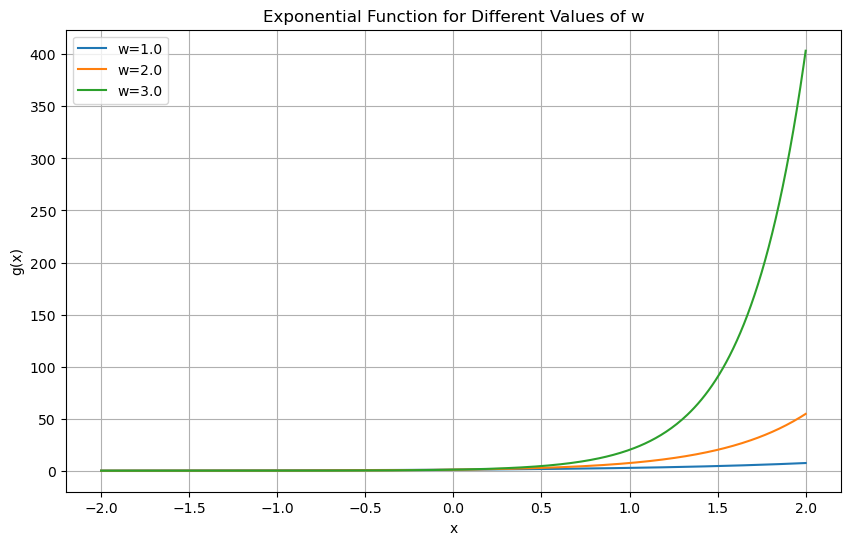

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Defining the exponential function
def exponential_function(x, a, b):
    return a * np.exp(b * x)

# Generating a range of x values
x_values = np.linspace(-2, 2, 400)

# Assuming different values for 'w' (represented by 'b' in the function)
# These values will change the rate of growth or decay of the function
w_values = [1.0, 2.0,3.0]  # Different rates of growth/decay

# Plotting the function for different values of 'b'
plt.figure(figsize=(10, 6))
for w in w_values:
    plt.plot(x_values, exponential_function(x_values, 1, w), label=f'w={w}')

plt.title('Exponential Function for Different Values of w')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)
plt.show()


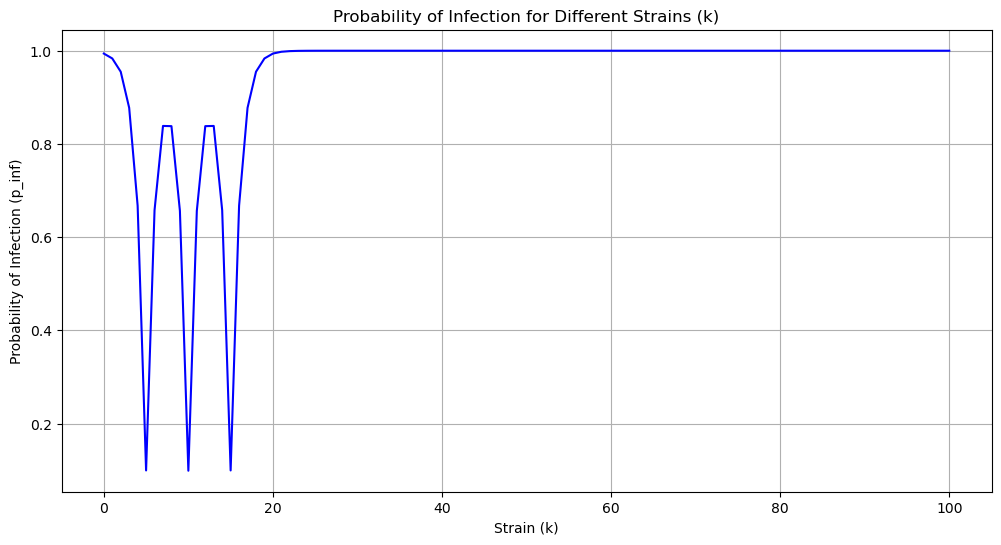

0.9087088043716739

In [8]:
from math import exp
import matplotlib.pyplot as plt

# Dummy values
M = 3
memories = [5, 10, 15]
k = 12
p0 = 0.5

# Function g(x) = e^(-x)
def g(x):
    return exp(-x)

# Adjusting the strain range to 0-100
k_values_short = range(101)

# Updated value for p0
p0_updated = 0.9

# Strain range (0 to 1000)
k_values = range(101)

# Calculating p_inf(j, k) for each k in the range 0-1000
p_inf_values = []
for k in k_values:
    p_inf_k = 1
    for mem in memories:
        difference = abs(mem - k)
        p_inf_k *= (1 - p0_updated * g(difference))
    p_inf_values.append(p_inf_k)

# Creating a plot
plt.figure(figsize=(12, 6))
plt.plot(k_values, p_inf_values, label='Probability of Infection', color='blue')
plt.title('Probability of Infection for Different Strains (k)')
plt.xlabel('Strain (k)')
plt.ylabel('Probability of Infection (p_inf)')
plt.grid(True)
plt.show()

# Return a subset of values for brevity
p_inf_values[::100]  # Return every 100th value for a concise overview


# Return a subset of values for brevity
p_inf_values_short[::10]  # Return every 10th value for a concise overview



p_inf

Mean: 4.902509749025097, Expected Mean: 5.0
Variance: 2.549194700529944, Expected Variance: 2.5


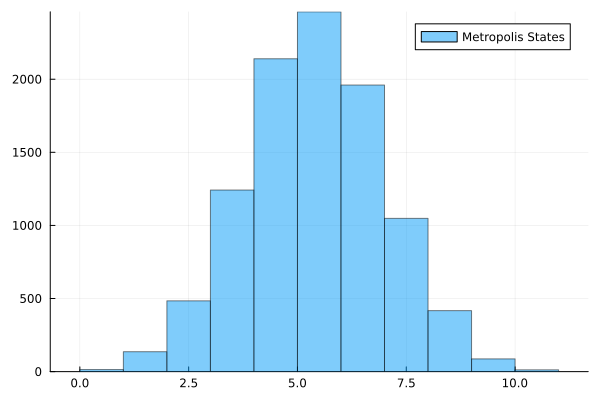

In [7]:
using Random, Distributions, Plots

function metropolis_binomial(n, p, steps)
    current_state = rand(0:n)
    states = [current_state]

    for _ in 1:steps
        proposal = current_state + (rand(Bool) ? 1 : -1) # random walk
        
        # Ensure proposal is within valid range
        if proposal >= 0 && proposal <= n
            acceptance_ratio = binomial_pdf(n, p, proposal) / binomial_pdf(n, p, current_state)
            if rand() < min(1, acceptance_ratio)
                current_state = proposal
            end
        end

        push!(states, current_state)
    end

    return states
end

function binomial_pdf(n, p, k)
    return binomial(n, k) * p^k * (1-p)^(n-k)
end

# main function
seed_value = 123
Random.seed!(seed_value)
n = 10
p = 0.5
steps = 10000
states = metropolis_binomial(n, p, steps)

# Calculating mean and variance
mean_states = mean(states)
variance_states = var(states)

println("Mean: $mean_states, Expected Mean: $(n*p)")
println("Variance: $variance_states, Expected Variance: $(n*p*(1-p))")

# Plotting the histogram of the states and the theoretical binomial distribution
histogram(states, bins=n+1, normalization=:probability, alpha=0.5, label="Metropolis States")
# scatter!(0:n, [pdf(Binomial(n, p), k) for k in 0:n], color=:red, label="Theoretical Binomial Distribution")

In [6]:
using Pkg
Pkg.add("Plots")
using Random

function gibbs_sampler(n::Int, mu::Vector{Float64}, sigma::Matrix{Float64})
    # Initialize variables
    x = zeros(n)
    y = zeros(n)

    # Gibbs sampler iterations
    for i in 2:n
        # Sample x conditional on y
        mu_x_given_y = mu[1] + sigma[1, 2] / sigma[2, 2] * (y[i - 1] - mu[2])
        sigma_x_given_y = sigma[1, 1] - sigma[1, 2] / sigma[2, 2] * sigma[1, 2]

        x[i] = randn() * sqrt(sigma_x_given_y) + mu_x_given_y

        # Sample y conditional on x
        mu_y_given_x = mu[2] + sigma[1, 2] / sigma[1, 1] * (x[i] - mu[1])
        sigma_y_given_x = sigma[2, 2] - sigma[1, 2] / sigma[1, 1] * sigma[1, 2]

        y[i] = randn() * sqrt(sigma_y_given_x) + mu_y_given_x
    end

    return hcat(x, y)
end

# Parameters for the bivariate normal distribution
seed_value = 123
Random.seed!(seed_value)
mu = [0.0, 0.0]
sigma = [1.0 0.7; 0.7 1.0]

# Number of samples
n_samples = 1000

# Generate samples using Gibbs sampler
samples = gibbs_sampler(n_samples, mu, sigma)

# Plot the samples
using Plots
plot(samples[:, 1], samples[:, 2], seriestype = :scatter, title = "Bivariate Normal Samples", xlabel = "X", ylabel = "Y", legend = false)


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...


LoadError: InterruptException:

Generated Poisson Samples: [1, 1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 3, 2, 1, 3, 1, 1, 1, 2, 2, 0, 4, 1, 3, 0, 0, 0, 2, 1, 3, 0, 0, 2, 2, 1, 2, 2, 0, 0, 3, 1, 0, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 4, 2, 2, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 0, 3, 4, 2, 0, 0, 2, 1, 0, 0, 3, 1, 0, 0]


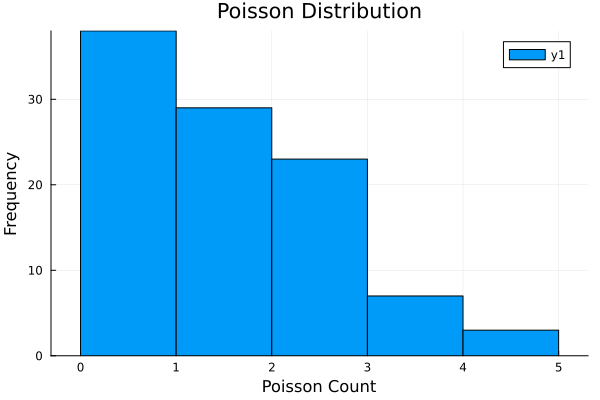

In [5]:
using Random
using Plots

function generate_poisson(lambda, n)
    poisson_count = 0
    cumulative_sum = 0.0

    for _ in 1:n
        exponential_var = -log(rand())
        cumulative_sum += exponential_var

        if cumulative_sum > 1.0
            break
        else
            poisson_count += 1
        end
    end

    return poisson_count
end

seed_value = 123
Random.seed!(seed_value)
lambda = 2.0
num_samples = 100

poisson_samples = [generate_poisson(lambda, 10) for _ in 1:num_samples]

# Display the generated Poisson samples
println("Generated Poisson Samples: ", poisson_samples)

# Plot the histogram of the Poisson samples
histogram(poisson_samples, bins=:, xlabel="Poisson Count", ylabel="Frequency", title="Poisson Distribution")


In [11]:
using Distributions

function generate_poisson(lambda, size)
    poisson_deviates = zeros(Int, size)
    time = 0.0
    for i in 1:size
        time += rand(Exponential(1/lambda))
        poisson_deviates[i] = sum(time .< rand(size))
    end
    return poisson_deviates
end

# Example usage
lambda = 2.0
size = 1000
poisson_values = generate_poisson(lambda, size)

# Display the generated Poisson deviates
println(poisson_values)

[744, 497, 439, 171, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
function multiply_fft(a, b)
    # Pad input vectors to the next power of 2 for efficient FFT
    n = nextpow2(length(a) + length(b) - 1)
    a_padded = vcat(a, zeros(eltype(a), n - length(a)))
    b_padded = vcat(b, zeros(eltype(b), n - length(b)))

    # Perform FFT on padded input vectors using the provided FFT function
    fft_a = FFT(a_padded, nextpow2(length(a_padded)), false)
    fft_b = FFT(b_padded, nextpow2(length(b_padded)), false)

    # Pointwise multiplication in frequency domain
    fft_result = fft_a .* fft_b

    # Inverse FFT to get the result in time domain
    result = FFT(fft_result, nextpow2(length(fft_result)), true)

    # Round real part to integers
    result_real = round.(Int, real(result))

    return result_real
end


function nextpow2(n)
    # Find the next power of 2 greater than or equal to n
    power = 0
    while 2^power < n
        power += 1
    end
    return 2^power
end

# Example usage:
a = 123  # Replace with your first large positive integer
b = 456  # Replace with your second large positive integer

result = multiply_fft(a, b)

println("Result of multiplication: ", result)


LoadError: BoundsError: attempt to access 1-element Vector{Int64} at index [2]

In [13]:
using FFTW

function multiply_fft(a, b)
    # Pad input vectors to the next power of 2 for efficient FFT
    n = nextpow2(length(a) + length(b) - 1)
    a_padded = vcat(a, zeros(eltype(a), n - length(a)))
    b_padded = vcat(b, zeros(eltype(b), n - length(b)))

    # Perform FFT on padded input vectors
    fft_a = fft(a_padded)
    fft_b = fft(b_padded)

    # Pointwise multiplication in frequency domain
    fft_result = fft_a .* fft_b

    # Inverse FFT to get the result in time domain
    result = ifft(fft_result)

    # Round real part to integers
    result_real = round.(Int, real(result))

    return result_real
end

function nextpow2(n)
    # Find the next power of 2 greater than or equal to n
    power = 0
    while 2^power < n
        power += 1
    end
    return 2^power
end

# Example usage:

a = 123
b = 456
c = 123456789
d = 987654321


println("Timing the multiplication of a and b:")
@time result = multiply_fft(a, b)

println("Result of multiplication: ", result)

println("Timing the multiplication of c and d:")

@time result2 = multiply_fft(c, d)

println("Result of fast multiplication on large numbers: ", result2)

Timing the multiplication of a and b:
  0.053173 seconds (52.84 k allocations: 2.641 MiB, 98.66% compilation time)
Result of multiplication: [56088]
Timing the multiplication of c and d:
  0.000077 seconds (24 allocations: 1.734 KiB)
Result of fast multiplication on large numbers: [121932631112635264]


In [37]:
using Statistics, Distributions

function fit_naive_bayes(X_train, y_train)
    classes = unique(y_train)
    class_priors = Dict()
    class_means = Dict()
    class_variances = Dict()

    for c in classes
        # Filter training data for the current class
        X_c = X_train[y_train .== c, :]

        # Calculate class prior probability
        class_priors[c] = size(X_c, 1) / size(X_train, 1)

        # Calculate mean and variance for each feature in the current class
        class_means[c] = mean(X_c, dims=1)
        class_variances[c] = var(X_c, dims=1)
    end

    return class_priors, class_means, class_variances
end

function predict_naive_bayes(X, class_priors, class_means, class_variances)
    num_samples, num_features = size(X)
    num_classes = length(keys(class_priors))
    predictions = zeros(Int, num_samples)

    for i in 1:num_samples
        posterior_probs = zeros(Float64, num_classes)

        for c in 1:num_classes
            class_prior = class_priors[c]
            class_mean = class_means[c]
            class_variance = class_variances[c]

            likelihood = prod(
                (1 / sqrt(2 * π * class_variance[j])) *
                exp(-(X[i, j] - class_mean[j])^2 / (2 * class_variance[j]))
                for j in 1:num_features
            )

            posterior_probs[c] = class_prior * likelihood
        end

        predictions[i] = argmax(posterior_probs)
    end

    return predictions
end

# Function to generate synthetic binary classification data
function generate_data(num_samples, num_features)
    X = randn(num_samples, num_features)

    # Generate random means and variances for two classes
    class_means = randn(2, num_features)
    class_variances = abs.(randn(2, num_features)) .+ 1.0

    # Assign each sample to a class (1 or 2)
    y = rand(1:2, num_samples)

    # Generate synthetic data based on class means and variances
    for i in 1:num_samples
        class_idx = y[i]
        for j in 1:num_features
            X[i, j] += class_means[class_idx, j]
            X[i, j] *= class_variances[class_idx, j]
        end
    end

    return X, y
end

# Example usage:
# Set random seed for reproducibility
Random.seed!(123)

# Generate synthetic binary classification data with 100 samples and 2 features
num_samples_binary = 100
num_features_binary = 2

X_binary, y_binary = generate_data(num_samples_binary, num_features_binary)

# Split the data into training and testing sets
split_ratio_binary = 0.8
split_idx_binary = Int(round(split_ratio_binary * num_samples_binary))

X_train_binary = X_binary[1:split_idx_binary, :]
y_train_binary = y_binary[1:split_idx_binary]

X_test_binary = X_binary[split_idx_binary+1:end, :]
y_test_binary = y_binary[split_idx_binary+1:end]

# Fit the model using binary classification data
priors_, means_, variances_ = fit_naive_bayes(X_train_binary, y_train_binary)

# Make predictions on binary classification test data
predictions_binary = predict_naive_bayes(X_test_binary, priors_, means_, variances_)

# Evaluate the accuracy
accuracy_binary = sum(predictions_binary .== y_test_binary) / length(y_test_binary)
println("Classification Accuracy: $accuracy_binary")

Classification Accuracy: 0.75


In [30]:
import Pkg; Pkg.add("StatsBase")
using Random, Statistics, StatsBase

export knn

function knn(X::Matrix{T}, Y::Matrix{T}, class::Vector{Int}, k::Int) where T <: Real
    testing = size(X, 2)
    predicted_class = zeros(Int, testing)
  
    # Manual calculation of L1 distance (Manhattan distance)
    distance = zeros(T, size(Y, 2), size(X, 2))
    for i = 1:size(Y, 2)
        for j = 1:size(X, 2)
            distance[i, j] = sum(abs.(Y[:, i] .- X[:, j]))
        end
    end
  
    for i = 1:testing # find k nearest neighbors
        perm = partialsortperm(distance[:, i], 1:k)
        predicted_class[i] = mode(class[perm]) # most common class
    end
  
    return predicted_class
end

# Set seed for reproducibility
seed_value = 123  # You can use any integer value as the seed
Random.seed!(seed_value)

(training, testing, features) = (100, 10, 30)
X = randn(features, testing)
Y = randn(features, training)
(k, classes) = (3, 2)
class = rand(1:classes, training)

predicted_class = knn(X, Y, class, k)


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


10-element Vector{Int64}:
 1
 2
 1
 2
 2
 1
 2
 1
 1
 1

In [14]:
using Distances, Statistics, StatsBase, Random
export knn

"""Performs k nearest neighbor classification with training data
Y. The classes should be numbered 1, 2,...""" 
function knn(X::Matrix{T}, Y::Matrix{T}, class::Vector{Int}, 
  k::Int) where T <: Real
  testing = size(X, 2)
  predicted_class = zeros(Int, testing)
  distance = pairwise(cityblock, Y, X)  # L1 distance (Manhattan distance)
  for i = 1:testing # find k nearest neighbors
    perm = partialsortperm(distance[:, i], 1:k)
    predicted_class[i] = mode(class[perm]) # most common class
  end
  return predicted_class
end

# Set seed for reproducibility
seed_value = 123  # You can use any integer value as the seed
Random.seed!(seed_value)

(training, testing, features) = (100, 10, 30)
X = randn(features, testing)
Y = randn(features, training)
(k, classes) = (3, 2)
class = rand(1:classes, training)

predicted_class = knn(X, Y, class, k)


10-element Vector{Int64}:
 1
 2
 1
 2
 2
 1
 2
 1
 1
 1

In [33]:
from transformers import AutoTokenizer, AutoModel
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Tokenize your input text
input_text = "Your input text here."
input_tokens = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

# Get model output with attention weights
output = model(**input_tokens)
attention_weights = output['attentions']

# Visualize the attention weights
# Assuming you have multiple attention heads, you can select a specific layer and head
layer = 8  # Choose the layer you want to visualize
head = 0   # Choose the attention head you want to visualize
attention_matrix = attention_weights[layer][0][head].detach().numpy()

plt.figure(figsize=(10, 10))
sns.heatmap(attention_matrix, annot=True, cmap="YlGnBu")
plt.show()

/Users/simonlee/opt/anaconda3/envs/ML/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: 100%|██████████| 28.0/28.0 [00:00<00:00, 10.7kB/s]
Downloading: 100%|██████████| 570/570 [00:00<00:00, 488kB/s]
Downloading: 100%|██████████| 232k/232k [00:02<00:00, 106kB/s] 
Downloading: 100%|██████████| 466k/466k [00:10<00:00, 43.9kB/s] 
Downloading:   0%|          | 934k/440M [00:14<1:52:00, 65.4kB/s] 

KeyboardInterrupt: 

In [28]:
!pip install cvxopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 3.1 MB/s eta 0:00:0000:0100:01


In [29]:
import time
import numpy as np
from scipy.optimize import linprog
from cvxopt import matrix, solvers

# Revised Simplex Method
c_rev = [3, 5]
A_rev = [[-2, -1], [-4, 3]]
b_rev = [-20, 0]
res_rev = linprog(c_rev, A_ub=A_rev, b_ub=b_rev, bounds=(0, None))

# Karmarkar's Algorithm
c_kar = matrix([3.0, 5.0])
G_kar = matrix([[-2.0, -1.0], [-4.0, 3.0]])
h_kar = matrix([-20.0, 0.0])
sol = solvers.lp(c_kar, G_kar, h_kar)

print("Revised Simplex Method:")
print("Optimal value:", res_rev.fun)
print("Optimal point:", res_rev.x)

print("\nKarmarkar's Algorithm:")
print("Optimal value:", sol['x'][0] * 3 + sol['x'][1] * 5)
print("Optimal point:", sol['x'])

Optimal solution found.
Revised Simplex Method:
Optimal value: 30.00000000104209
Optimal point: [1.00000000e+01 2.35419469e-10]

Karmarkar's Algorithm:
Optimal value: 28.0
Optimal point: [ 6.00e+00]
[ 2.00e+00]



In [26]:
from scipy.optimize import linprog

# Objective function coefficients
c = [1, 0, 0, 1, 1]

# Coefficients for inequalities
A = [[-1, 1, 0, 0, 0],
     [0, -1, 1, 0, 0],
     [1, 0, 0, 1, 0],
     [-1, 0, 0, 0, 1]]
b = [5, 7, 0, 0]

# Bounds for variables
x1_bounds = (0, None)
x3_bounds = (2, None)

# Solving the linear program
res = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, (None, None), x3_bounds, (None, None), (None, None)])

# Extracting and printing the results
print('Optimal value:', res.fun)
print('Optimal point:', res.x)

Optimal value: -1108630239567.5537
Optimal point: [ 1.73476735e+12  1.05423040e+12  5.27115200e+11 -2.73430874e+12
 -1.09088850e+11]


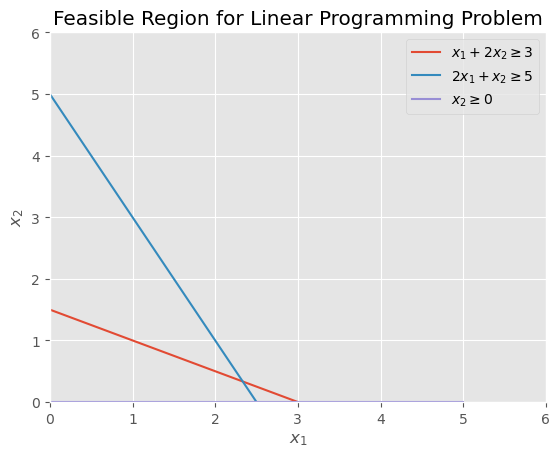

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# Define the constraints
x = np.linspace(0, 5, 400)
y1 = (3 - x) / 2
y2 = 5 - 2 * x
y3 = np.zeros_like(x)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the constraints
ax.plot(x, y1, label=r'$x_{1} + 2x_{2} \geq 3$')
ax.plot(x, y2, label=r'$2x_{1} + x_{2} \geq 5$')
ax.plot(x, y3, label=r'$x_{2} \geq 0$')

# Define the vertices of the feasible region
vertices_x = [0, 7/3, 5]
vertices_y = [5, 1/3, 0]

# Shade the feasible region
ax.fill_between(x, y3, y1, where=(y1<=y3) & (x>=7/3) & (x<=5), color='grey', alpha=0.5)
ax.fill_between(x, y3, y2, where=(y2<=y3) & (x<=7/3) & (x>=0), color='grey', alpha=0.5)

# Set the limits of the plot
plt.xlim((0, 6))
plt.ylim((0, 6))

# Add a legend
ax.legend(loc='upper right')

# Add labels and title
plt.xlabel(r'$x_{1}$')
plt.ylabel(r'$x_{2}$')
plt.title('Feasible Region for Linear Programming Problem')

# Display the plot
plt.show()

# Chapter 2: Sorting

#### 2.2 Quicksort

most elegant sorting algorithm that builds on the divide and conqure prinicple, where it randomly selects a pivot and partitions the entries based on the pivot. This algorithm is also recursive creating constant partitions until you and down to one entry

In [1]:
function quicksort(x::Vector, left = 1, right = length(x))
    i = rand(left:right) # select a random splitting value
    split = x[i]
    (x[left], x[i]) = (split, x[left])
    i = left
    for j = (left + 1):right # position the splitting value
        if x[j] <= split
            i=i+1
            (x[i], x[j]) = (x[j], x[i])
        end
    end
    (x[left], x[i]) = (x[i], split)
    if i > left + 1 #sort to the left of the value
        quicksort(x, left,i-1)
    end
    if i + 1 < right # sort to the right of the value
        quicksort(x,i+1,right)
    end
end
x = [5, 4, 3, 1, 2, 8, 7, 6, -1];
quicksort(x)
println(x)
x = ["a", "c", "d", "b", "f", "e", "h", "g", "y"];
quicksort(x)
println(x)

[-1, 1, 2, 3, 4, 5, 6, 7, 8]
["a", "b", "c", "d", "e", "f", "g", "h", "y"]


#### Quickselect

A variation of quicksort designed to find the kth smallest element in an undordered list. 

In [4]:
function quickselect(x::Vector, k::Int, left = 1, right = length(x))
    i = rand(left:right) # select a random splitting value
    split = x[i]
    (x[left], x[i]) = (split, x[left])
    i = left
    for j = (left + 1):right # position the splitting value
        if x[j] <= split
            i=i+1
            (x[i], x[j]) = (x[j], x[i])
        end
    end
    (x[left], x[i]) = (x[i], split)
    j=i-left+1#find the order statistic y
    if k==j 
        y = x[i]
    elseif k<j
        y = quickselect(x, k, left,i-1)
    else
        y = quickselect(x,k-j,i+1,right)
    end
    return y
end

k=8;
x = [5, 4, 3, 1, 2, 8, 7, 6];
xk = quickselect(x, k)
println(xk)
k=5;
x = ["a", "c", "d", "b", "f", "e", "h", "g", "y"];
xk = quickselect(x, k)
println(xk)

8
e


#### Bisection

Divide and conquer algorithm to find a root for a given equation $f(x)=0$

In [5]:
function bisect(f::Function, a::T, b::T, tol::T) where T <: Real
    (fa, fb) = (f(a), f(b))
    @assert(a<b&&fa*fb<=zero(T)) # check for input error
    for iteration = 1:100
        m=(a+b)/2
        fm = f(m)
        if abs(fm) < tol
            return (m, iteration)
        end
        if fa * fm < zero(T)
            (b, fb) = (m, fm)
        else
            (a, fa) = (m, fm)
        end
    end
    return ((a + b) / 2, 100)
end
f(x) = x^3 - 5x + 1.0
(x, iteration) = bisect(f, 0.0, 2.0, 1e-14)

(0.20163967572340624, 48)

In [6]:
function binary_search(x::Vector, value)
    a=1
    b = length(x)
    while a <= b
        m = div(a + b, 2)
        if x[m] > value
            b=m-1
        elseif x[m] < value
            a=m+1
        else
            return m
        end
    end
    return 0
end
x = ["a", "b", "d", "f", "g"];
println(binary_search(x, "f"))
x = [1, 2, 4, 7, 9];
println(binary_search(x, 3))

4
0


#### Priority Queues

data structure consisting of keys and priorities.

In [12]:
import Pkg;Pkg.add("DataStructures")
using DataStructures

pq = PriorityQueue() # empty queue
pq["a"] = 10 # enqueue or push
pq["b"] = 5
pq["c"] = 15
peek(pq)
dequeue!(pq) # dequeue or pop

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


"b"